## This is a sample Machine Learning project that exemplifies how to use multiple ML non-supervised techniques, on one same dataset, when you have different types of variables - qualitative and quantitative - to analyse altogether, using Python, Pandas, Numpy, Scipy, Scikit-learn, Factor-Analyzer, Sympy, Pingouin, PyShp, Prince, Matplotlib, Seaborn and Plotly

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("dark_background")
from sklearn.cluster import KMeans
from scipy.stats import zscore
from sklearn.metrics import silhouette_score
import pingouin as pg
import seaborn as sns
import plotly.express as px
from scipy.stats import chi2_contingency
import plotly.graph_objects as go
import prince
import os
import plotly.io as pio
if os.getenv("GITHUB_ACTIONS") == "true":
    pio.renderers.default = "png"
else:
    pio.renderers.default='colab'

- the formulas shown at this notebook have been taken from the following reference:

    FÁVERO, L. P.; BELFIORE, P. Manual de Análise de Dados: Estatística e Machine Learning com Excel®, SPSS®, Stata®, R® e Python®. 2ª edição, 1288 p. Brasil: ccGEN LTC, 2024.
    
    Available in Brazil at:
    
    https://www.amazon.com.br/Manual-An-C3-A1lise-Dados-Estat-C3-ADstica-Learning-dp-8595159920/dp/8595159920

## Use Case Scenario and Data - Client Segmentation: Cluster + Correspondence Analysis

In this sample use case, we have thousands of clients at our dataset and a total of 6 variables (features), being 2 of these quantitative variables and 4 qualitative variables. We wanna explore this dataset in order to find out unknown patterns or associations regarding the observations, categories and/or variables. This way we may understand better our clients, in order to serve them better and grow our business.

Most of our variables are qualitative, so we wish to do a Correspondence Analysis on them, but, before, we decided to do a Cluster Analysis on the two other variables, so that we transform them into qualitative variables as well... and only then perform the correspondence analysis, on all variables. Regarding non-supervised techniques in ML, we may use multiple methods in one same dataset, such as in this case, only being careful to use the right input type of variables for each technique - and also knowing the outputs, for evaluating if these should be used as inputs at other ML techniques, if needed:

Cluster Analysis:
- input: quantitative (metric) variables
- output: qualitative (categoric) variables

Factorial Analysis (PCA):
- input: quantitative (metric) variables
- output: quantitative (metric) variables

Correspondence Analysis:
- input: qualitative (categoric) variables
- output: quantitative (metric) variables

So, we can use Cluster Analysis to transform quantitative into qualitative data and then use these as inputs at Correspondence Analysis - that's what we're gonna do here. At other cases, we could use Correspondence Analysis to transform qualitative into quantitative data and use it at Cluster Analysis or Factorial Analysis. Or we could use Factorial Analysis first, for reducing dimensionality, and then use its output as a Cluster Analysis or Correspondence Analysis inputs (after categorization, if needed).

In this case, as on other cases, we could also simply use categorization to turn quantitative into qualitative data - by creating discrete categories of intervals. The other way around would be riskier, as we should be much careful when transforming from qualitative to quantitative data, in order to avoid arbitrary weighting errors. For this last case, Correspondence Analysis would do the job with no accidental biases. In other scenarios, we could simply throw away certain variables if we knew they wouldn't make significant difference in our analysis.

For other examples of how to use multiple ML techniques on one same dataset, when you have variables or data that cannot be applied directly into one ML technique alone, please see the other use cases at this repository:<br>
Factorial (PCA) + Correspondence Analysis:<br>
[https://github.com/danielpm1982/sample-ml-multiple-unsupervised-technique-analysis/blob/master/pca-correspondence-analysis-pisa-scores.ipynb](https://github.com/danielpm1982/sample-ml-multiple-unsupervised-technique-analysis/blob/master/pca-correspondence-analysis-pisa-scores.ipynb)<br>

For simpler examples and detailed info about each individual non-supervised technique above, check out these other repos, first:<br>
Cluster Analysis:<br>
[https://github.com/danielpm1982/sample-ml-clustering](https://github.com/danielpm1982/sample-ml-clustering)<br>
Factorial Analysis (PCA):<br>
[https://github.com/danielpm1982/sample-ml-pca-factorial-analysis](https://github.com/danielpm1982/sample-ml-pca-factorial-analysis)<br>
Correspondence Analysis (SCA and MCA):<br>
[https://github.com/danielpm1982/sample-ml-correspondence-analysis](https://github.com/danielpm1982/sample-ml-correspondence-analysis)

In [2]:
# reading and displaying our dataset
clients_df = pd.read_excel("client-segmentation.xlsx")
clients_df

,Gender,EverMarried,Age,Graduated,SpendingScore,FamilySize
0,Male,No,22,No,Low,4.0
1,Female,Yes,38,Yes,Average,3.0
2,Female,Yes,67,Yes,Low,1.0
3,Male,Yes,67,Yes,High,2.0
4,Female,Yes,40,Yes,High,6.0
...,...,...,...,...,...,...
8063,Male,No,22,No,Low,7.0
8064,Male,No,35,No,Low,4.0
8065,Female,No,33,Yes,Low,1.0
8066,Female,No,27,Yes,Low,4.0


In [3]:
clients_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gender         8068 non-null   object 
 1   EverMarried    7928 non-null   object 
 2   Age            8068 non-null   int64  
 3   Graduated      7990 non-null   object 
 4   SpendingScore  8068 non-null   object 
 5   FamilySize     7733 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 378.3+ KB


In [4]:
clients_df.isna().sum()

Gender             0
EverMarried      140
Age                0
Graduated         78
SpendingScore      0
FamilySize       335
dtype: int64

In [5]:
clients_df.dropna(inplace=True)

In [6]:
clients_df.isna().sum()

Gender           0
EverMarried      0
Age              0
Graduated        0
SpendingScore    0
FamilySize       0
dtype: int64

In [7]:
clients_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7538 entries, 0 to 8067
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gender         7538 non-null   object 
 1   EverMarried    7538 non-null   object 
 2   Age            7538 non-null   int64  
 3   Graduated      7538 non-null   object 
 4   SpendingScore  7538 non-null   object 
 5   FamilySize     7538 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 412.2+ KB


In [8]:
# we'll not reset the indexes so that we keep them as IDs to the original dataset observations

In [9]:
# Now, we'll do a Clustering Analysis having as inputs only the two metric variables from our original dataset.
clients_quantitative_only_df = clients_df[['Age','FamilySize']]
clients_quantitative_only_df

,Age,FamilySize
0,22,4.0
1,38,3.0
2,67,1.0
3,67,2.0
4,40,6.0
...,...,...
8063,22,7.0
8064,35,4.0
8065,33,1.0
8066,27,4.0


In [10]:
clients_quantitative_only_df.describe()

,Age,FamilySize
count,7538.000000,7538.000000
mean,43.524144,2.845450
std,16.612202,1.527899
min,18.000000,1.000000
25%,31.000000,2.000000
50%,41.000000,3.000000
75%,53.000000,4.000000
max,89.000000,9.000000


In [11]:
# As the units of these two variables are in different units (years and family_members), we should first standardize them to
# Z-score values
clients_quantitative_only_std_df = clients_quantitative_only_df.apply(zscore, ddof=1)
clients_quantitative_only_std_df

,Age,FamilySize
0,-1.295683,0.755646
1,-0.332535,0.101152
2,1.413169,-1.207835
3,1.413169,-0.553341
4,-0.212142,2.064632
...,...,...
8063,-1.295683,2.719126
8064,-0.513125,0.755646
8065,-0.633519,-1.207835
8066,-0.994699,0.755646


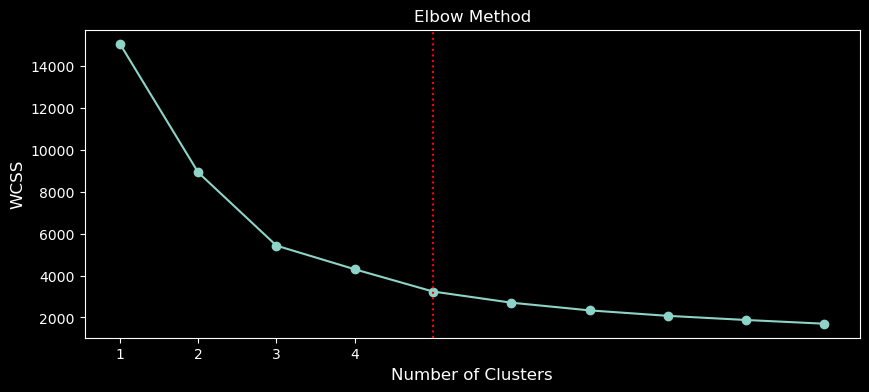

In [12]:
# identifying the number of clusters (centroids) through the Elbow method
# We can see that, starting from 5 clusters, the reduction on the WCSS starts being visually neglectful. That's the elbow point, 
# and, thus, we should choose 5 clusters at our KMeans clustering, for this dataset.
elbow = []
K = range(1,11)
for k in K:
    kmeanElbow = KMeans(n_clusters=k, init='random', random_state=100).fit(clients_quantitative_only_std_df)
    elbow.append(kmeanElbow.inertia_)
plt.figure(figsize=(10,4))
plt.plot(K, elbow, marker='o')
plt.xlabel('Number of Clusters', fontsize=12)
plt.xticks(range(1,5))
plt.ylabel('WCSS', fontsize=12)
plt.axvline(x = 5, linestyle = 'dotted', color = 'red')
plt.title('Elbow Method', fontsize=12)
plt.show()

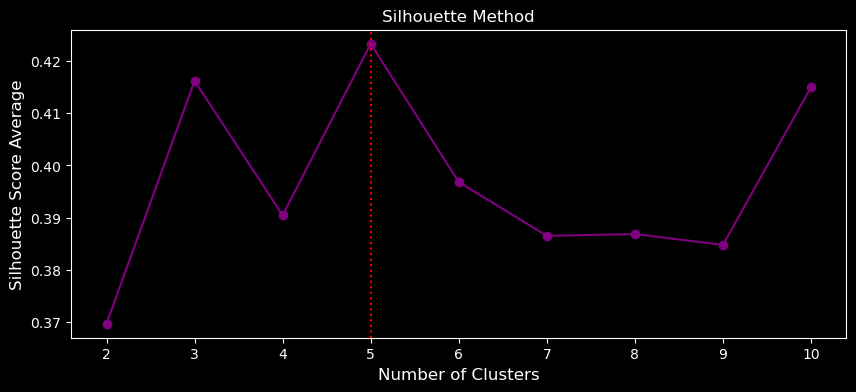

In [13]:
# identifying the number of clusters (centroids) through the Silhouette method
# Simply put, we should choose the max number of clusters for which the silhouette score in average would be closer to 1. Which, 
# again, in this case, would be 5 clusters. Therefore, we'll keep choosing 5.

silhouette = []
I = range(2,11)
for i in I: 
    kmeanSilhouette = KMeans(n_clusters=i, init='random', random_state=100).fit(clients_quantitative_only_std_df)
    silhouette.append(silhouette_score(clients_quantitative_only_std_df, kmeanSilhouette.labels_))
plt.figure(figsize=(10,4))
plt.plot(range(2, 11), silhouette, color = 'purple', marker='o')
plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('Silhouette Score Average', fontsize=12)
plt.title('Silhouette Method', fontsize=12)
plt.axvline(x = 5, linestyle = 'dotted', color = 'red') 
plt.show()

In [14]:
# proceeding the clustering, using K-Means method and considering that we have defined that 5 clusters should be the output
kmeans = KMeans(n_clusters=5, init='random', random_state=100).fit(clients_quantitative_only_std_df)

In [15]:
pd.options.mode.chained_assignment = None
# extracting the generated labels from the final kmeans clustering result and setting that as a new category variable at the 
# original dataframe and at the quantitative-only and standardized quantitative-only df above, for describing which cluster each 
# observation belongs to
# We have clusters labeled from 0 until 4, associated to each respective and individual observation at those df
kmeans_clusters_labels = kmeans.labels_
clients_df['Cluster_Indicator_Kmeans'] = kmeans_clusters_labels
clients_quantitative_only_df['Cluster_Indicator_Kmeans'] = kmeans_clusters_labels
clients_quantitative_only_std_df['Cluster_Indicator_Kmeans'] = kmeans_clusters_labels
clients_df['Cluster_Indicator_Kmeans'] = clients_df['Cluster_Indicator_Kmeans'].astype('category')
clients_quantitative_only_df['Cluster_Indicator_Kmeans'] = (
    clients_quantitative_only_df['Cluster_Indicator_Kmeans'].astype('category')
)
clients_quantitative_only_std_df['Cluster_Indicator_Kmeans'] = (
    clients_quantitative_only_std_df['Cluster_Indicator_Kmeans'].astype('category')
)
print(clients_df.info())
print(clients_quantitative_only_df.info())
print(clients_quantitative_only_std_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7538 entries, 0 to 8067
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Gender                    7538 non-null   object  
 1   EverMarried               7538 non-null   object  
 2   Age                       7538 non-null   int64   
 3   Graduated                 7538 non-null   object  
 4   SpendingScore             7538 non-null   object  
 5   FamilySize                7538 non-null   float64 
 6   Cluster_Indicator_Kmeans  7538 non-null   category
dtypes: category(1), float64(1), int64(1), object(4)
memory usage: 419.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 7538 entries, 0 to 8067
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       7538 non-null   int64   
 1   FamilySize                7538 non-null

In [16]:
# Analizing how significant each variable has been to the Cluster Analysis
# Cluster_Indicator_Kmeans MS: indicates the variability between groups
# Within MS: indicates the variability within the groups
# F: test statistic (Cluster_Indicator_Kmeans MS / Within MS)
# p-unc: p-value of the F statistic
# If p-value < 0.05: at least one cluster has a mean (for that variable) statistically different from the others
# Here, both variables have significantly contributed to the formation of at least one cluster (very high MS between, very low MS 
# between, very high F and p-unc <<<0.05.

In [17]:
# Age
pg.anova(dv='Age', 
         between='Cluster_Indicator_Kmeans', 
         data=clients_quantitative_only_std_df,
         detailed=True).T

,0,1
Source,Cluster_Indicator_Kmeans,Within
SS,5741.233311,1795.766689
DF,4,7533
MS,1435.308328,0.238387
F,6020.925602,NaN
p-unc,0.0,NaN
np2,0.76174,NaN


In [18]:
# Family Size
pg.anova(dv='FamilySize', 
         between='Cluster_Indicator_Kmeans', 
         data=clients_quantitative_only_std_df,
         detailed=True).T

,0,1
Source,Cluster_Indicator_Kmeans,Within
SS,6093.24086,1443.75914
DF,4,7533
MS,1523.310215,0.191658
F,7948.068021,NaN
p-unc,0.0,NaN
np2,0.808444,NaN


In [19]:
# Age and FamilySize means per cluster
clients_quantitative_only_df.groupby(by=['Cluster_Indicator_Kmeans'],observed=False).mean()

,Age,FamilySize
Cluster_Indicator_Kmeans,,
0,30.911765,5.870844
1,70.043575,1.790990
2,38.561439,1.592158
3,28.436681,3.435434
4,51.387170,3.763774


In [20]:
# extracting the final centroids' coordinates for the final kmeans clusters
kmeans_clusters_centroids = pd.DataFrame(kmeans.cluster_centers_)
if "Cluster_Indicator_Kmeans" in clients_quantitative_only_std_df:
    kmeans_clusters_centroids.columns=clients_quantitative_only_std_df.drop(columns=["Cluster_Indicator_Kmeans"]).columns
kmeans_clusters_centroids['Cluster_Indicator_Kmeans']='Cluster_'+kmeans_clusters_centroids.index.astype(str)
kmeans_clusters_centroids

,Age,FamilySize,Cluster_Indicator_Kmeans
0,-0.759224,1.980100,Cluster_0
1,1.596383,-0.690137,Cluster_1
2,-0.298739,-0.820271,Cluster_2
3,-0.908216,0.386141,Cluster_3
4,0.473328,0.601037,Cluster_4


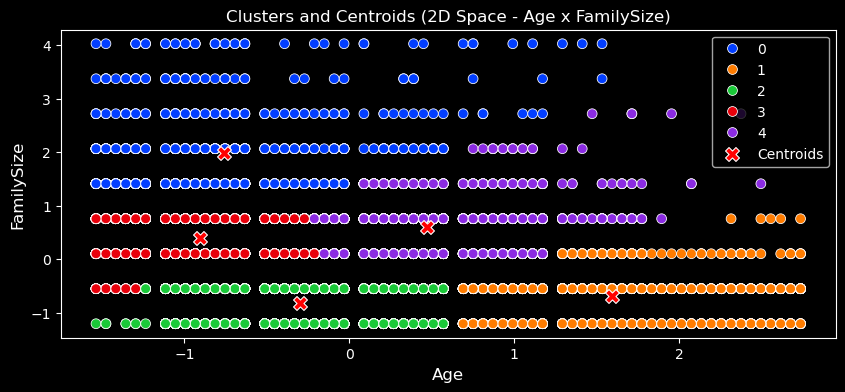

In [21]:
# as we have only two quantitative variables at the Clustering Analysis, we may show the result, along with the centroids, at a
# 2D scatter plot graph (instead of in a 3D), as below. As we're showing the centroids, we gotta use the 
# clients_quantitative_only_std_df, from which the centroids have been calculated. Observe that each color corresponds to a 
# cluster (from 0 to 4) and their centroids are displayed as a red X on the respective center areas of each cluster:
plt.figure(figsize=(10,4))
sns.scatterplot(data=clients_quantitative_only_std_df, x='Age', y='FamilySize', hue='Cluster_Indicator_Kmeans', palette='bright', s=50)
sns.scatterplot(data=kmeans_clusters_centroids, x='Age', y='FamilySize', c='red', label='Centroids', marker="X", s=100)
plt.title('Clusters and Centroids (2D Space - Age x FamilySize)', fontsize=12)
plt.xlabel('Age', fontsize=12)
plt.ylabel('FamilySize', fontsize=12)
plt.legend()
plt.show()

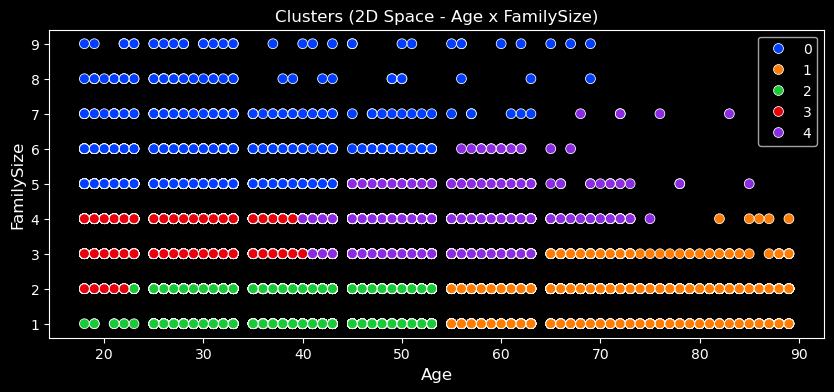

In [22]:
# if we display only the clusters, and not the centroids, we then may use the clients_quantitative_only_df, for better visualizing
# the actual values of each cluster's variables - basically the same relative cluster disposition above, but in another X and Y 
# scale (not standardized), which is more semantic. We cannot show the centroids in a non-standardized df as below, only the 
# clusters. Additionally, regarding the clusters, you may notice that this is clearly a discrete distribution pattern, although
# both variables are quantitative, i.e., we only have integer values in both axes (not float or "Real" numbers). This gives this
# graph a layered-type view, instead of the dispersed view we'd have if we had Real continuous numbers instead.
plt.figure(figsize=(10,4))
sns.scatterplot(data=clients_quantitative_only_df, x='Age', y='FamilySize', hue='Cluster_Indicator_Kmeans', palette='bright', s=50)
plt.title('Clusters (2D Space - Age x FamilySize)', fontsize=12)
plt.xlabel('Age', fontsize=12)
plt.ylabel('FamilySize', fontsize=12)
plt.legend()
plt.show()

In [23]:
# Now that we have concluded the Cluster Analysis, we may proceed with the Correspondence Analysis (MCA), using the qualitative 
# output of the Clustering (cluster labels) as an input to the MCA. The Age and FamilySize quantitative variables have been 
# transformed into the Cluster_Indicator_Kmeans qualitative variable, and now we may ignore those two and keep with the 
# Cluster_Indicator_Kmeans at the MCA, together with the other qualitative variables, originally available
clients_df

,Gender,EverMarried,Age,Graduated,SpendingScore,FamilySize,Cluster_Indicator_Kmeans
0,Male,No,22,No,Low,4.0,3
1,Female,Yes,38,Yes,Average,3.0,3
2,Female,Yes,67,Yes,Low,1.0,1
3,Male,Yes,67,Yes,High,2.0,1
4,Female,Yes,40,Yes,High,6.0,0
...,...,...,...,...,...,...,...
8063,Male,No,22,No,Low,7.0,0
8064,Male,No,35,No,Low,4.0,3
8065,Female,No,33,Yes,Low,1.0,2
8066,Female,No,27,Yes,Low,4.0,3


In [24]:
# selecting only the qualitative variables (including the Cluster_Indicator_Kmeans)
clients_quanlitative_only_df = clients_df[['Gender', 'EverMarried', 'Graduated', 'SpendingScore', 'Cluster_Indicator_Kmeans']]
clients_quanlitative_only_df

,Gender,EverMarried,Graduated,SpendingScore,Cluster_Indicator_Kmeans
0,Male,No,No,Low,3
1,Female,Yes,Yes,Average,3
2,Female,Yes,Yes,Low,1
3,Male,Yes,Yes,High,1
4,Female,Yes,Yes,High,0
...,...,...,...,...,...
8063,Male,No,No,Low,0
8064,Male,No,No,Low,3
8065,Female,No,Yes,Low,2
8066,Female,No,Yes,Low,3


In [25]:
print(f"{clients_quanlitative_only_df.Gender.value_counts()}\n")
print(f"{clients_quanlitative_only_df.EverMarried.value_counts()}\n")
print(f"{clients_quanlitative_only_df.Graduated.value_counts()}\n")
print(f"{clients_quanlitative_only_df.SpendingScore.value_counts()}\n")
print(f"{clients_quanlitative_only_df.Cluster_Indicator_Kmeans.value_counts().sort_index()}\n")

Gender
Male      4163
Female    3375
Name: count, dtype: int64

EverMarried
Yes    4466
No     3072
Name: count, dtype: int64

Graduated
Yes    4731
No     2807
Name: count, dtype: int64

SpendingScore
Low        4504
Average    1888
High       1146
Name: count, dtype: int64

Cluster_Indicator_Kmeans
0     782
1    1354
2    2474
3    1603
4    1325
Name: count, dtype: int64



In [26]:
# Chi2 association tests between all variables
# We need to check out if each and every of the 5 variables actually is associated to at least one other variable, if not, that
# variable that would be associated to no other variable should be discarded. For us not to have to test each pair of variables
# at a contingency table - two on two - we can select one of the variables to be tested to all others... if that variable is
# significantly associated to all others, then the inverse is also true, and all variables should be kept... for later discovering
# the associations between categories. So let's select the variable 'SpendingScore' and test its chi2 association to all others, 
# two variables at a time. This is done based on the observed frequencies, the calculated expected frequencies and the sq of 
# residuals of their category values - summmed up the total as the total chi2 for that pair of variables, calculating then the 
# p-value for the ddof at the chi2 distribution and ultimately comparing it to the desired alfa. We'll do this automatically 
# through the api below:

contingency_table_1 = chi2_contingency(pd.crosstab(clients_quanlitative_only_df["SpendingScore"],
                                       clients_quanlitative_only_df["Gender"]))
print(f"SpendingScore x Gender p-value: {round(contingency_table_1[1], 4)}")

contingency_table_2 = chi2_contingency(pd.crosstab(clients_quanlitative_only_df["SpendingScore"],
                                       clients_quanlitative_only_df["EverMarried"]))
print(f"SpendingScore x EverMarried p-value: {round(contingency_table_2[1], 4)}")

contingency_table_3 = chi2_contingency(pd.crosstab(clients_quanlitative_only_df["SpendingScore"],
                                       clients_quanlitative_only_df["Graduated"]))
print(f"SpendingScore x Graduated p-value: {round(contingency_table_3[1], 4)}")

contingency_table_4 = chi2_contingency(pd.crosstab(clients_quanlitative_only_df["SpendingScore"],
                                       clients_quanlitative_only_df["Cluster_Indicator_Kmeans"]))
print(f"SpendingScore x Cluster_Indicator_Kmeans p-value: {round(contingency_table_4[1], 4)}")

# As we see, all variables are associated to at least the variable 'SpendingScore', therefore, are all significant and eligible
# for the Correspondence Analysis.

SpendingScore x Gender p-value: 0.0
SpendingScore x EverMarried p-value: 0.0
SpendingScore x Graduated p-value: 0.0
SpendingScore x Cluster_Indicator_Kmeans p-value: 0.0


In [27]:
# instantiating the MCA object for all possible dimensions (see below: max_dim = mca_df.J_ - mca_df.K_)
mca_df = prince.MCA(n_components=9).fit(clients_quanlitative_only_df)

In [28]:
# checking out the eigenvalues to all dimensions
eigenvalues_df = mca_df.eigenvalues_summary
print(eigenvalues_df)

          eigenvalue % of variance % of variance (cumulative)
component                                                    
0              0.442        24.55%                     24.55%
1              0.270        15.00%                     39.55%
2              0.238        13.21%                     52.76%
3              0.202        11.25%                     64.01%
4              0.186        10.34%                     74.35%
5              0.158         8.79%                     83.13%
6              0.137         7.63%                     90.77%
7              0.112         6.22%                     96.99%
8              0.054         3.01%                    100.00%


In [29]:
# calculating max dimensions
max_dim = mca_df.J_ - mca_df.K_
print(f"max_dim = {mca_df.J_} - {mca_df.K_} = {max_dim}")

max_dim = 14 - 5 = 9


In [30]:
# calculating the total inertia
print(f"total inertia (manual): {eigenvalues_df["eigenvalue"].astype(float).sum()}")

total_inertia = mca_df.total_inertia_
# or extracting it from the mca object:
print(f"total inertia (api): {total_inertia}")

total inertia (manual): 1.799
total inertia (api): 1.7999999999999885


In [31]:
# calculating the average inertia
avg_inertia = total_inertia / max_dim
print(f"avg_inertia = {avg_inertia:.3f}")

# as the avg_inertia is 0.200, we should keep the 4 first eigenvalues (dimensions) at our analysis (>0.200), but, as we can't
# plot a graph of 4 dimensions, we'll keep only the 3 first dimensions

avg_inertia = 0.200


In [32]:
# reinstantiating the mca object only for 3 dimensions (lambdas, or components)
mca_df = prince.MCA(n_components=3).fit(clients_quanlitative_only_df)
print(mca_df.eigenvalues_summary)
print(f'\npartial_inertia: {mca_df.eigenvalues_summary["eigenvalue"].astype("float").sum():.3f}')

# keeping the first 3 lambda values (dimensions) we keep 52.76% of total inertia at our analysis. If more is desirable, we should 
# keep more lambdas, i.e., more dimensions, but it wouldn't be possible to plot them all in a perceptual map (as only a max of 3 
# dimensions is possible). We'd then have to analyse the distances only through tables and numbers, instead of visually.

          eigenvalue % of variance % of variance (cumulative)
component                                                    
0              0.442        24.55%                     24.55%
1              0.270        15.00%                     39.55%
2              0.238        13.21%                     52.76%

partial_inertia: 0.950


In [33]:
# calculating the standard coordinates (from the binary table) - which is done by dividing the extracted principal coordinates 
# (from the burt table) by the sq of eigenvalues, as below:
principal_coordinates = mca_df.column_coordinates(clients_quanlitative_only_df)
standard_coordinates = principal_coordinates/np.sqrt(mca_df.eigenvalues_)
standard_coordinates.rename(columns={0: 'X', 1: 'Y', 2:'Z'}, inplace=False)

,X,Y,Z
Gender__Female,-0.236523,-0.653927,-0.737880
Gender__Male,0.191753,0.530147,0.598209
EverMarried__No,-1.601284,-0.162705,-0.041124
EverMarried__Yes,1.101465,0.111919,0.028288
Graduated__No,-0.763391,1.381075,0.861258
Graduated__Yes,0.452936,-0.819420,-0.511002
SpendingScore__Average,1.424467,-1.121419,1.835795
SpendingScore__High,1.610741,2.433804,-1.707910
SpendingScore__Low,-1.006950,-0.149178,-0.334973
Cluster_Indicator_Kmeans__0,-1.224921,1.311033,1.123103


In [34]:
# extracting observations' coordinates (from the standard coordinates, from the Binary table of frequencies)
observation_coordinates = mca_df.row_coordinates(clients_quanlitative_only_df)
observation_coordinates.rename(columns={0: 'X', 1: 'Y', 2:'Z'}, inplace=False)

,X,Y,Z
0,-0.913535,0.511199,0.443749
1,0.270908,-0.305238,0.350115
2,0.294973,0.080612,-0.812788
3,0.904166,0.834023,-0.820158
4,0.340740,0.476682,-0.361080
...,...,...,...
8063,-0.880959,0.582074,0.441295
8064,-0.913535,0.511199,0.443749
8065,-0.530221,-0.744385,-0.515086
8066,-0.755925,-0.165715,-0.097921


In [35]:
# Creating and showing a 3D Perceptual Map
# Here, we're using the standard coordinates (from the Binary table of frequencies), and therefore, we may also plot the
# observation_coordinates, derived, by default (at the api), from the standard coordinates, as well.

# preparing the chart df for plotting data from
chart = standard_coordinates.reset_index()
var_chart = pd.Series(chart['index'].str.split('_', expand=True).iloc[:,0])
name_categ=[]
for col in clients_quanlitative_only_df:
    name_categ.append(clients_quanlitative_only_df[col].sort_values(ascending=True).unique())
    categories = pd.DataFrame(name_categ).stack().reset_index()
chart_df_mca = pd.DataFrame({'variable_category': chart['index'],
                             'obs_x': chart[0],
                             'obs_y': chart[1],
                             'obs_z': chart[2],
                             'variable': var_chart,
                             'category': categories[0]})

# preparing color mapping according to unique variables
unique_vars = chart_df_mca["variable"].unique()
color_map = {var: color for var, color in zip(unique_vars, px.colors.qualitative.Plotly)}
chart_df_mca['color'] = chart_df_mca['variable'].map(color_map)

# creating the Figure, adding each variable's trace with categories (1 color per trace or variable) and plotting the categories 
# from the chart above
fig = go.Figure()
for var in unique_vars:
    subset = chart_df_mca[chart_df_mca['variable'] == var]
    fig.add_trace(go.Scatter3d(
        x=subset["obs_x"],
        y=subset["obs_y"],
        z=subset["obs_z"],
        mode='markers+text',
        text=subset["category"],
        textposition='top center',
        textfont=dict(size=10),
        name=var,
        marker=dict(size=5, color=color_map[var])
    ))

# adding another trace for plotting observations from the observation_coordinates df
fig.add_trace(go.Scatter3d(
        x=observation_coordinates[0],
        y=observation_coordinates[1],
        z=observation_coordinates[2],
        mode='markers',
        # text="",
        # textposition='top center',
        # textfont=dict(size=10),
        name="Clients",
        marker=dict(size=2, color="purple")
    ))

# adjusting graph visual details
fig.update_layout(
    title={
        'text': "Perceptual Map - MCA<br><span style='font-size:12px'>(standard coordinates - binary table frequencies)",
        'x': 0.5,
        'xanchor': 'center',
        'font': dict(size=14),
        'pad': dict(t=0, b=0)
    },
    legend=dict(
        itemsizing='constant',
        font=dict(size=11),
    ),
    scene=dict(
        xaxis=dict(title=dict(text=f"Dim. 1: {mca_df.eigenvalues_summary.iloc[0,1]} of inertia",font=dict(size=10)),tickfont=dict(size=9)),
        yaxis=dict(title=dict(text=f"Dim. 2: {mca_df.eigenvalues_summary.iloc[1,1]} of inertia",font=dict(size=10)),tickfont=dict(size=9)),
        zaxis=dict(title=dict(text=f"Dim. 3: {mca_df.eigenvalues_summary.iloc[2,1]} of inertia",font=dict(size=10)),tickfont=dict(size=9))
    ),
    width=700,
    height=500,
    margin=dict(
        l=80,
        r=80,
        t=90,
        b=50
    )
)

fig.show()